## Dados

### Importação

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Regressao_Linear/winequality-red.csv', delimiter=';')

In [ ]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dados['alcohol'] = dados['alcohol'].astype(float) #Mudando o tipo da coluna string para float. Para poder trabalhar com a informação

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1594 non-null   float64
 1   volatile acidity      1594 non-null   float64
 2   citric acid           1594 non-null   float64
 3   residual sugar        1594 non-null   float64
 4   chlorides             1594 non-null   float64
 5   free sulfur dioxide   1594 non-null   float64
 6   total sulfur dioxide  1594 non-null   float64
 7   density               1594 non-null   float64
 8   pH                    1594 non-null   float64
 9   sulphates             1594 non-null   float64
 10  alcohol               1594 non-null   float64
 11  quality               1594 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.6 KB


### Separando as observações do target

In [ ]:
x = dados[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

In [ ]:
y = dados['quality']

In [ ]:
x.shape

(1594, 11)

In [ ]:
y.shape

(1594,)

### Análise Exploratoria

In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


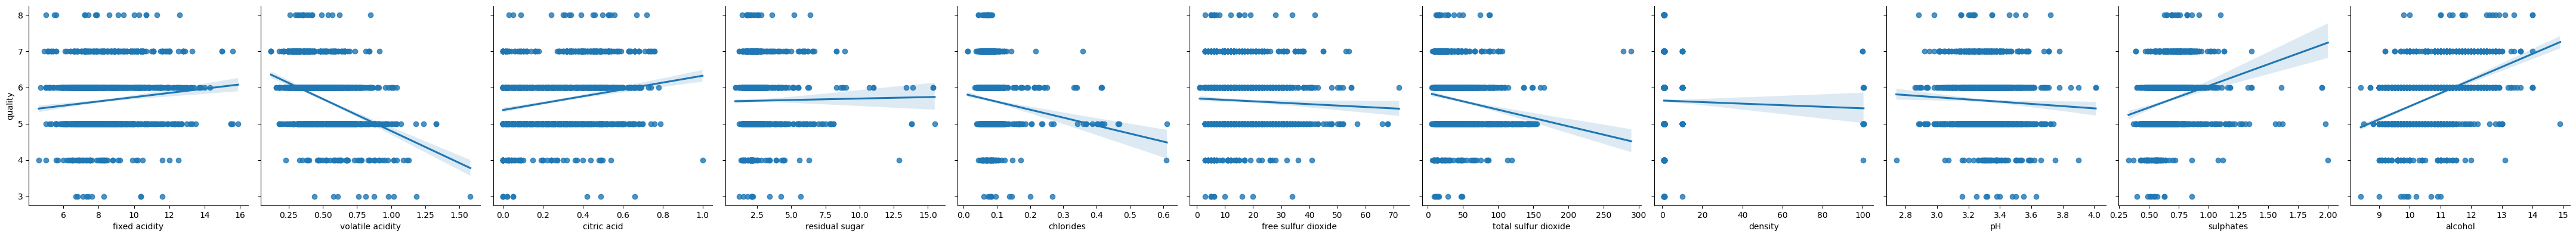

In [ ]:
sns.pairplot(dados,x_vars=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'], y_vars='quality', size=4, kind='reg')

*Usando os graficos acima para poder visualizar quais observações/Variaveis tem maior e menos relação com o resultado alvo, o "target" quality*

In [ ]:
import numpy as np

In [ ]:
x_var = dados[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].values

In [ ]:
y_var = dados['quality'].values

In [ ]:
correlacao = np.corrcoef(x_var.T, y_var)
correlacao

array([[ 1.00000000e+00, -2.56119356e-01,  6.71605363e-01,
         1.17534447e-01,  9.28805843e-02, -1.51623771e-01,
        -1.10029818e-01,  2.61781832e-01, -6.81993866e-01,
         1.85078044e-01, -5.86583552e-02,  1.25701614e-01],
       [-2.56119356e-01,  1.00000000e+00, -5.52504345e-01,
        -5.83268252e-06,  6.12681641e-02, -1.18626430e-02,
         7.46520802e-02,  4.83548169e-03,  2.36327502e-01,
        -2.60509597e-01, -2.01001839e-01, -3.91495008e-01],
       [ 6.71605363e-01, -5.52504345e-01,  1.00000000e+00,
         1.44799132e-01,  2.03367409e-01, -5.90819112e-02,
         3.83127239e-02,  8.77162504e-02, -5.41992120e-01,
         3.13947898e-01,  1.12291215e-01,  2.27858403e-01],
       [ 1.17534447e-01, -5.83268252e-06,  1.44799132e-01,
         1.00000000e+00,  5.54469848e-02,  1.86482977e-01,
         2.01748994e-01,  2.99588271e-01, -8.61950030e-02,
         6.67281412e-03,  4.42374151e-02,  1.40149061e-02],
       [ 9.28805843e-02,  6.12681641e-02,  2.0336740

*"corrcoef" é usado para verificar a correlação de cada observação com o resultado.*

<Axes: >

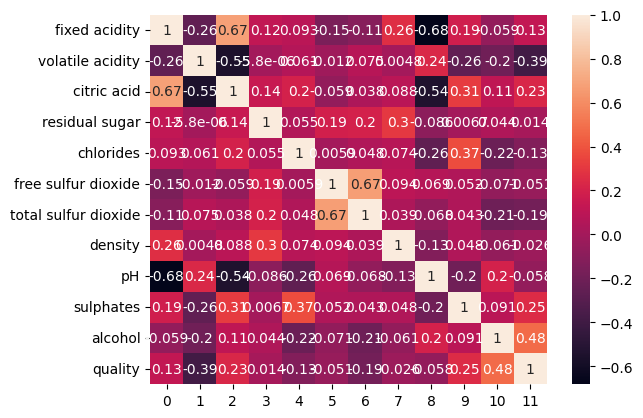

In [ ]:
sns.heatmap(correlacao, yticklabels=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],annot=True)


*Passando a variavel que guarda as informações da correlação para o grafico acima, conseguimor observalor melhor a correlação de cada observação com o resultado "quality". E o nivel de correlação*

### Separação dos dados para treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = dados[['fixed acidity','citric acid','sulphates','alcohol']] #Pela a analise exploratoria, vimos que somente essas observações são as mais relevantes para constuir nosso modelo. Por isso definimos novamente o eixo x

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.30)

# KNN (k-nearest neighbors algorithm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
valores = {}
k = 1
vencedor = []

while k <= 25:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_treino,y_treino)
  previsao_knn = knn.predict(x_teste)
  acertos_knn = metrics.accuracy_score(y_teste,previsao_knn)
  valores[k] = round(acertos_knn,4)
  k += 1

print(valores)
valor_k = max(valores, key=valores.get)
print("Valor do k é ",valor_k," e porcentagem de acertos",valores[valor_k])

{1: 0.6096, 2: 0.5804, 3: 0.5699, 4: 0.5804, 5: 0.572, 6: 0.5783, 7: 0.5929, 8: 0.5846, 9: 0.5825, 10: 0.5971, 11: 0.5866, 12: 0.5825, 13: 0.5741, 14: 0.5908, 15: 0.5929, 16: 0.6054, 17: 0.5866, 18: 0.5908, 19: 0.5929, 20: 0.5887, 21: 0.5825, 22: 0.5929, 23: 0.5866, 24: 0.5866, 25: 0.5887}
Valor do k é  1  e porcentagem de acertos 0.6096


*Acima foi feito um Loop, para descobrir qual é o melhor valor do "K" e a porcentagem de acerto do modelo usando esse "K". Imprimindo o resultado*

# Regressao Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logred = LogisticRegression()

In [ ]:
logred.fit(x_treino,y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
previsao_logreg = logred.predict(x_teste)

In [ ]:
logred.predict([[11.2,0.00,0.58,9.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([5])

In [ ]:
acertos_logreg = metrics.accuracy_score(y_teste,previsao_logreg)
acertos_logreg

0.5970772442588727

*Acima mostra a porcetagem de acerto do nosso Modelo. Usando a Regressão Logistica*

# **Observação!**

In [ ]:
valores[valor_k] #KNN

0.6096

In [ ]:
acertos_logreg #Regressão Logistica

0.5970772442588727

*Acima conseguimos ver a porcentagem de acerto usando o KNN e o outro usando a Regressão Logistica. A que tiver mais porcentagem de acerto, é a melhor para usarmos para analisarmos os dados*